In [18]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [19]:
data=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hu_12_formations_points.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
data.columns[60:]

Index(['HUC_10', 'HUC_12', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS',
       'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS',
       ...
       'Washakie Formation', 'Water', 'Wayan and Smiths Formations',
       'Wells and Amsden Formations (TB), or Casper Formation and Madison Limestone (N, S)',
       'White River Formation',
       'Wilkins Peak Member and Tipton Shale Member or Tongue of Green River Formation',
       'Wilkins Peak Member of Green River Formation', 'Willwood Formation',
       'Wind River Formation - at base locally includes equivalent of Indian Meadows Formation',
       'Wind River and Indian Meadows Formations'],
      dtype='object', length=228)

In [21]:
X = data.iloc[0:, 0:51].values

In [22]:
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

#y = data.iloc[0:,82:].values #train data for multilabel problem
y = data.HUC_12
lb.fit(y)
y_transformed=lb.transform(y)
#ybinarized = Binarizer().fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.05, random_state=86)

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [45]:
#multi class learner predicting on HUC_12 to classify location based on geochemistry
scores0=[]
for i in range(1,50):
    clf=ExtraTreesClassifier(n_estimators=5, max_features=51, n_jobs=-1)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores0.append(accuracy_score(y_test.astype(int), preds, normalize=True))

KeyboardInterrupt: 

In [26]:
clf=ExtraTreesClassifier(n_estimators=50, max_features=50, n_jobs=4)
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
score(y_test.astype(int), preds, normalize=True)

KeyboardInterrupt: 

In [ ]:
plt.plot(scores0)

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=51, max_features=51, n_jobs=-1)
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
accuracy_score(y_test.astype(int), preds, normalize=True)

0.1394843962008141

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(multi_class='crammer_singer')
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
accuracy_score(y_test.astype(int), preds, normalize=True)

array([1428, 1864,  141, ..., 1057,  739,  533], dtype=int64)

In [ ]:
from tpot import TPOTClassifier
tpot=TPOTClassifier(generations=1, population_size=20, verbosity=20, scoring='f1_micro', n_jobs=-1)
tpot.fit(X_train, y_train)

29 operators have been imported by TPOT.


Skipped pipeline #2 due to time out. Continuing to the next pipeline.


Skipped pipeline #5 due to time out. Continuing to the next pipeline.


Skipped pipeline #9 due to time out. Continuing to the next pipeline.


Skipped pipeline #12 due to time out. Continuing to the next pipeline.


Skipped pipeline #16 due to time out. Continuing to the next pipeline.


Skipped pipeline #18 due to time out. Continuing to the next pipeline.


Skipped pipeline #22 due to time out. Continuing to the next pipeline.


Optimization Progress:  55%|███████████████████████████▌                      | 22/40 [07:47<2:20:19, 467.74s/pipeline]

In [33]:
 prediction = tpot.score(X_test, y_test)

True

In [11]:
#clf=KNeighborsClassifier(n_neighbors=i, weights='uniform')
#clf=ExtraTreesClassifier(n_estimators=i, max_features=30)

scores=[]
for i in range(1,20,5):
    clf=ExtraTreesClassifier(n_estimators=i, max_features=30)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores.append(accuracy_score(y_test.astype(int), preds, normalize=True))
    

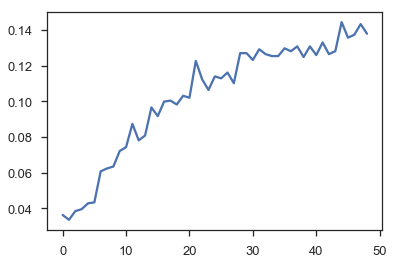

In [11]:
plt.plot(scores0)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        preds[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], preds[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    preds.ravel())
average_precision["micro"] = average_precision_score(y_test, preds,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.68


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.68')

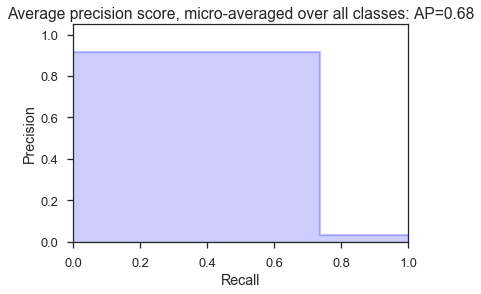

In [19]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype(int), preds, normalize=True)

0.3336950623982637

In [146]:
from sklearn.model_selection import GridSearchCV

In [157]:
etc=ExtraTreesClassifier()
parameters={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50], 'max_features':[1,5,10,15,20,25,30,35,45,50]}

In [158]:
clf=GridSearchCV(etc, parameters)

In [159]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': [1, 5, 10, 15, 20, 25, 30, 35, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
tuned=clf.fit(X_train, y_train.astype(int))

In [161]:
tuned_predictions=tuned.predict(X_test)

In [164]:
accuracy_score(y_test.astype(int), tuned_predictions, normalized=False)

1038

In [172]:
tuned.results()

AttributeError: 'GridSearchCV' object has no attribute 'results'

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [110]:
nn=Sequential()
nn.add(Dense(10, activation='softmax', input_shape=(51,)))
nn.add(Dropout(0.8))
nn.add(Dense(1, activation='sigmoid'))

#nn.add(Dropout(0.2))
#nn.add(Dense(208, activation='sigmoid'))
#nn.add(Dropout(0.1))
#nn.add(Dense(208, activation='sigmoid'))
#nn.add(Dropout(0.3))


In [111]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_crossentropy'])

In [112]:
from keras import utils
dummy_y = utils.to_categorical(y_train)

In [113]:
dummy_y.shape


(14736, 2175)

In [114]:
history=nn.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, validation_data=(X_test, y_test), shuffle=True,
              verbose=0)

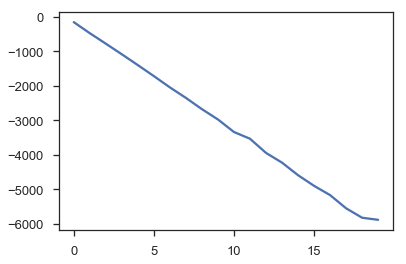

In [115]:
plt.plot(history.history['loss'])

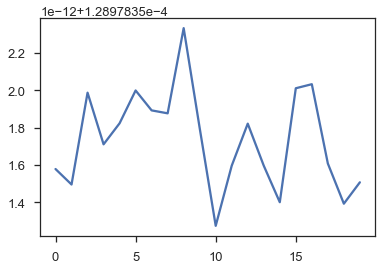

In [117]:
plt.plot(history.history['categorical_crossentropy'])

In [118]:
neural=nn.predict(X_test)
neural[0]


array([0.99667454], dtype=float32)

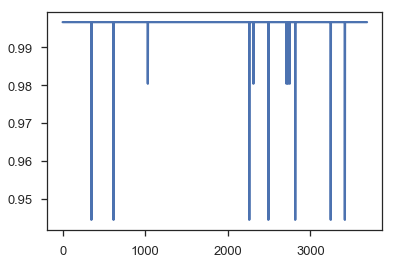

In [119]:
nbin = Binarizer(threshold=0.05).fit_transform(neural)
plt.plot(neural)


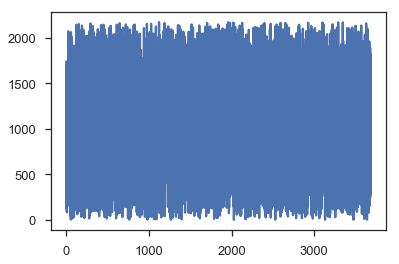

In [100]:
plt.plot(y_test)

In [101]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=30)

# train
classifier.fit(X_train, y_train)

# predict
predictions = np.asarray(classifier.predict(X_test).todense())


IndexError: Index (0) out of range -1 to 0.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i,:],
                                                        predictions[i,:])
    average_precision[i] = average_precision_score(y_test[i,:], predictions[i,:])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [39]:
data.iloc[0:1,201:]

,Meeteetse Formation,Meeteetse Formation and Lewis Shale,Mesaverde Formation (N) or Mesaverde Group (S),Mesaverde Group - Almond Formation,Mesaverde Group - Blair Formation,Mesaverde Group - Ericson Sandstone,Mesaverde Group - Rock Springs Formation,Mesozoic and Paleozoic rocks,Metasedimentary and metavolcanic rocks,Metasedimentary and metavolcanic rocks - metamorphosed mafic and ultramafic rocks,...,Washakie Formation,Water,Wayan and Smiths Formations,"Wells and Amsden Formations (TB), or Casper Formation and Madison Limestone (N, S)",White River Formation,Wilkins Peak Member and Tipton Shale Member or Tongue of Green River Formation,Wilkins Peak Member of Green River Formation,Willwood Formation,Wind River Formation - at base locally includes equivalent of Indian Meadows Formation,Wind River and Indian Meadows Formations
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
